In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Данные содержат:
# age - возраст в годах
# sex - (1 = мужчина; 0 = женщина)
# cp - тип боли в груди
# trestbps - артериальное давление в покое (в мм рт. ст. при поступлении в больницу)
# chol - уровень холестерина в сыворотке крови в мг/дл
# fbs - (сахар в крови натощак > 120 мг/дл) (1 = истинно; 0 = ложно)
# restecg - результаты электрокардиографии в состоянии покоя
# thalach - максимальная достигнутая частота сердечных сокращений
# exang - стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
# oldpeak - депрессия ST, вызванная физической нагрузкой по сравнению с покоем
# slope - наклон сегмента ST пика физической нагрузки
# ca - количество крупных сосудов (0-3), окрашенных при флоуроскопии
# thal - 3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект
# target - наличие или отсутствие заболевания (1=да, 0=нет)

In [5]:
# Анализ данных

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

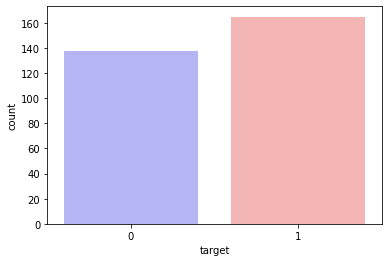

In [7]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [8]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Процент пациентов, не страдающих сердечными заболеваниями: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Процент пациентов с заболеваниями сердца: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Процент пациентов, не страдающих сердечными заболеваниями: 45.54%
Процент пациентов с заболеваниями сердца: 54.46%


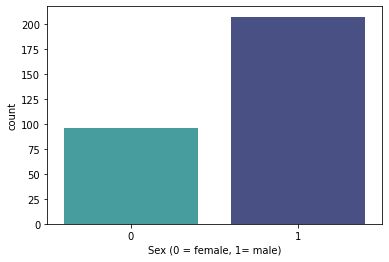

In [9]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [10]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Процент пациентов женского пола: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Процент пациентов мужского пола: {:.2f}%".format((countMale / (len(df.sex))*100)))

Процент пациентов женского пола: 31.68%
Процент пациентов мужского пола: 68.32%


In [11]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


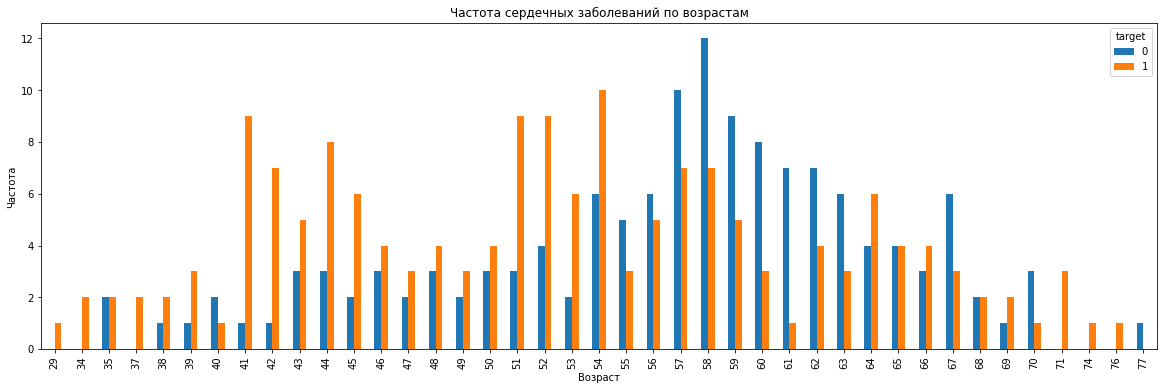

In [12]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Частота сердечных заболеваний по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

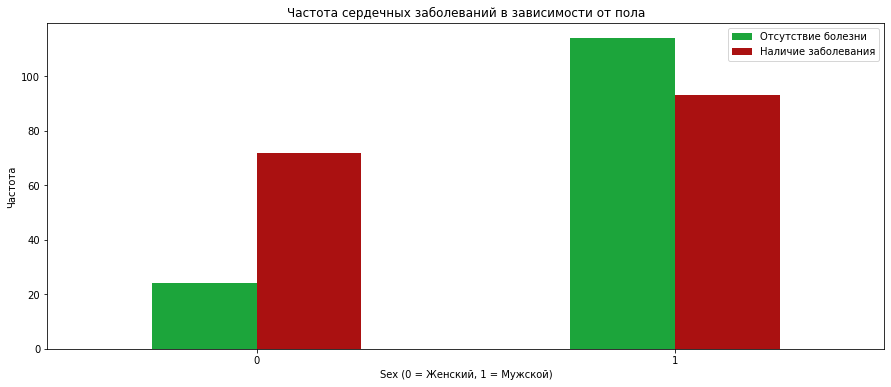

In [13]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Частота сердечных заболеваний в зависимости от пола')
plt.xlabel('Sex (0 = Женский, 1 = Мужской)')
plt.xticks(rotation=0)
plt.legend(["Отсутствие болезни", "Наличие заболевания"])
plt.ylabel('Частота')
plt.show()

In [14]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [15]:
# Нормализация
x = ((x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))).values
print(x.min())
print(x.max())

0.0
1.0


In [16]:
# Мы разделим наши данные. 80% наших данных будут обучающими, а 20% - тестовыми.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [18]:
method_names = []
method_scores = []

Logistic Regression Classification Test Accuracy 0.8360655737704918


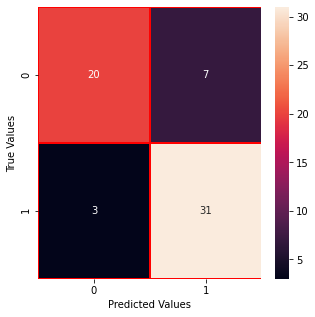

In [19]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'score')

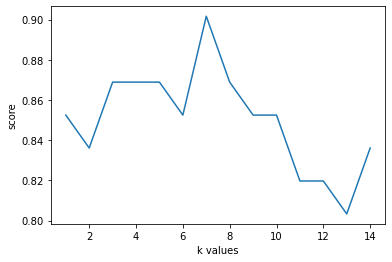

In [20]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

Score for Number of Neighbors = 2: 0.9016393442622951


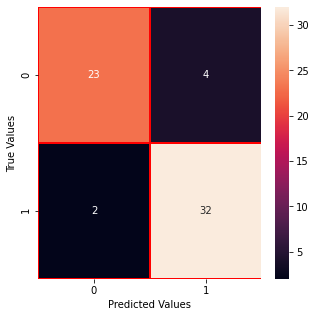

In [21]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 2: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 0.8524590163934426


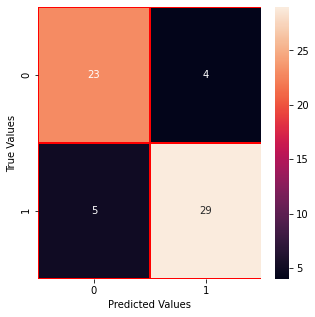

In [22]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'Method Score')

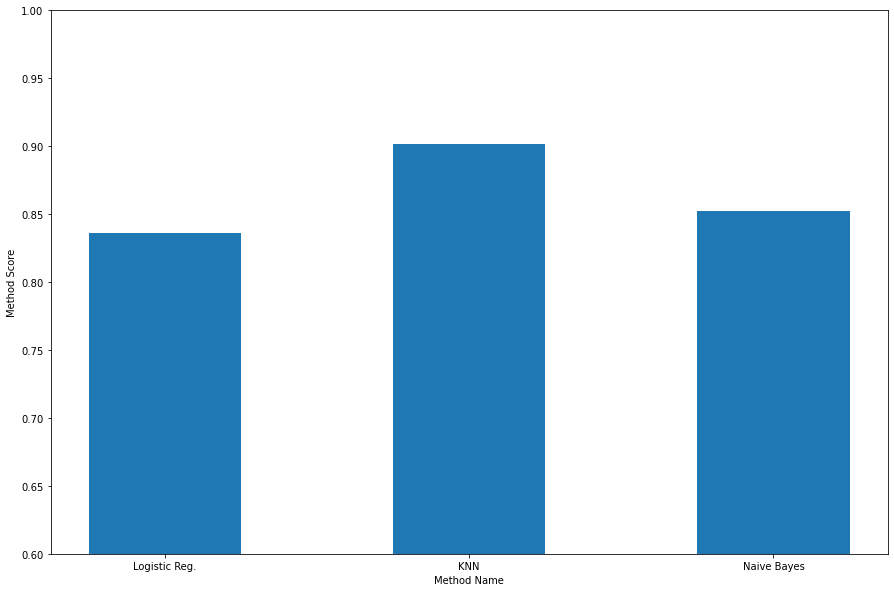

In [23]:
plt.figure(figsize=(15,10))
plt.ylim([0.6,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')